In [1]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

(615, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        615 non-null    int64  
 1   Category  615 non-null    object 
 2   Age       615 non-null    int64  
 3   Sex       615 non-null    object 
 4   ALB       614 non-null    float64
 5   ALP       597 non-null    float64
 6   ALT       614 non-null    float64
 7   AST       615 non-null    float64
 8   BIL       615 non-null    float64
 9   CHE       615 non-null    float64
 10  CHOL      605 non-null    float64
 11  CREA      615 non-null    float64
 12  GGT       615 non-null    float64
 13  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
None
ID           0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT         

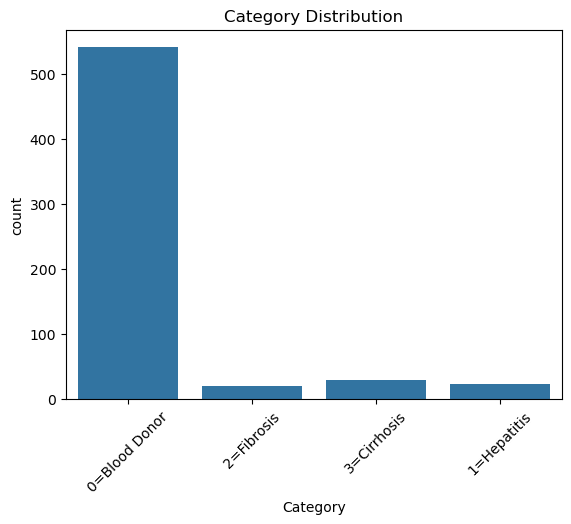

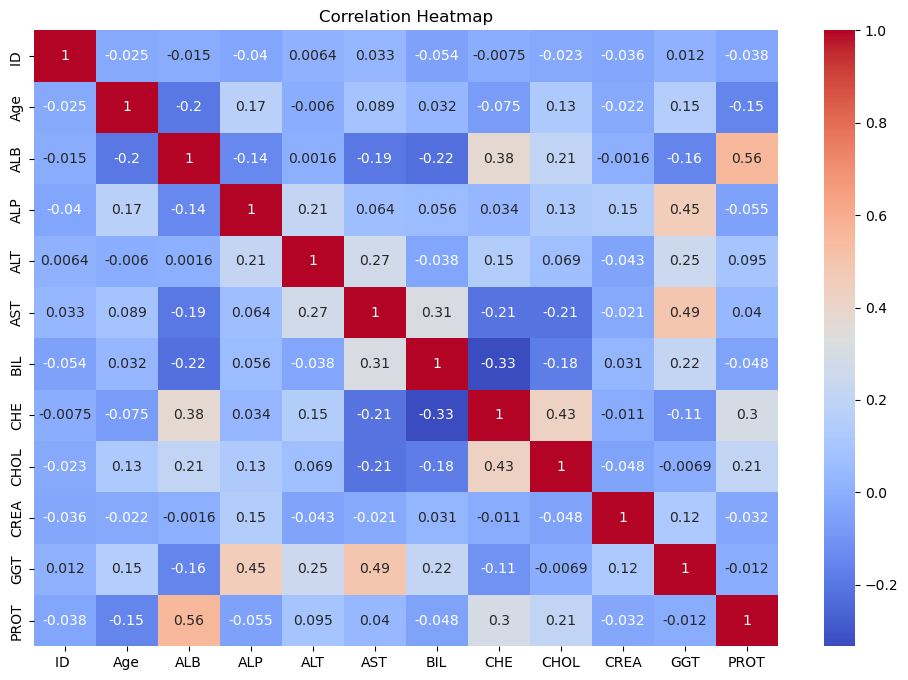

In [2]:
# Load CSV
df = pd.read_csv("/Users/sivakarthick/College/ML/ML Mini project/HepatitisCdata.csv")

# Initial overview
print(df.shape)
print(df.info())
print(df.isnull().sum())

category_counts = df['Category'].value_counts()
print("Number of unique categories:", category_counts.shape[0])
print("\nCounts for each category:\n", category_counts)

# Target distribution
sns.countplot(data=df, x='Category')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [3]:
# Display min and max for each column
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)
print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 ID       1.00
Age     19.00
ALB     14.90
ALP     11.30
ALT      0.90
AST     10.60
BIL      0.80
CHE      1.42
CHOL     1.43
CREA     8.00
GGT      4.50
PROT    44.80
dtype: float64

Maximum values:
 ID       615.00
Age       77.00
ALB       82.20
ALP      416.60
ALT      325.30
AST      324.00
BIL      254.00
CHE       16.41
CHOL       9.67
CREA    1079.10
GGT      650.90
PROT      90.00
dtype: float64


In [4]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical data
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Category'])

# Drop original label
X = df.drop(columns=['Category', 'Target'])
y = df['Target']


/var/folders/hm/y283f8nx3hvc44nfcnrd4mcm0000gn/T/ipykernel_5926/1121488932.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')


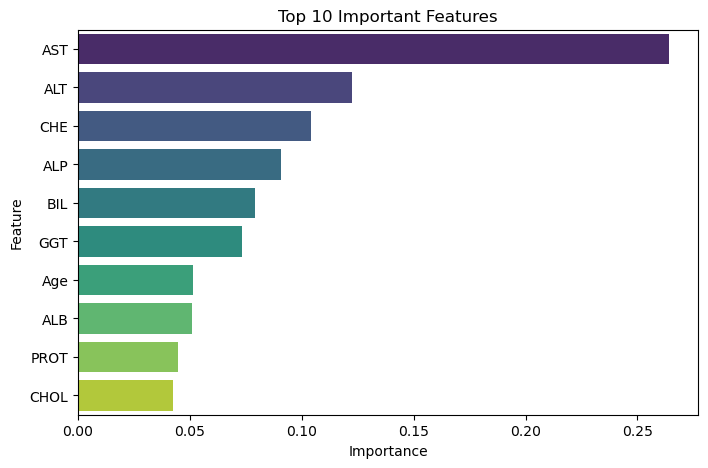

     AST   ALT    CHE   ALP    BIL    GGT  Age   ALB
0   26.1  36.1  10.20  67.0    5.0   45.4   54  43.0
1  125.0  23.1   6.97  26.9   17.0   72.2   46  45.0
2   38.9  25.4   6.06  85.7    4.2   46.0   63  27.8
3   29.0  29.6  10.67  75.2    7.3   34.9   47  49.5
4   60.2   4.8   1.80  85.3  200.0  151.0   41  31.0


In [5]:
# Scale features for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features")
plt.show()

# Select top 8 features
top_features = feat_imp['Feature'].head(8).tolist()
X_selected = df[top_features]
print(X_selected.head())


In [6]:
# Scale selected features
X_scaled_final = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, stratify=y, random_state=42)



Decision Tree Results:
Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.38      0.60      0.46         5
           2       0.33      0.25      0.29         4
           3       0.71      0.83      0.77         6

    accuracy                           0.93       123
   macro avg       0.61      0.66      0.63       123
weighted avg       0.94      0.93      0.93       123



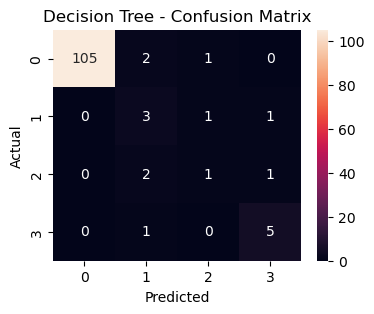

In [7]:
results=set()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Decision Tree", acc, prec, rec, f1))

print(f"\nDecision Tree Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Logistic Regression Results:
Accuracy: 0.9186991869918699
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.50      0.20      0.29         5
           2       0.67      0.50      0.57         4
           3       0.67      0.67      0.67         6

    accuracy                           0.92       123
   macro avg       0.69      0.59      0.62       123
weighted avg       0.91      0.92      0.91       123



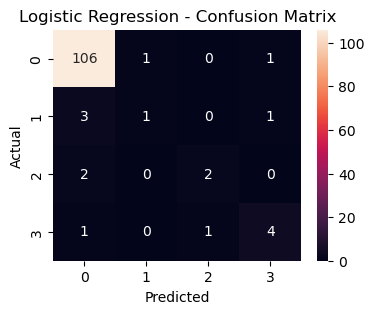

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Logistic Regression", acc, prec, rec, f1))

print(f"\nLogistic Regression Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Random Forest Results:
Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       0.67      0.40      0.50         5
           2       1.00      0.50      0.67         4
           3       0.71      0.83      0.77         6

    accuracy                           0.95       123
   macro avg       0.84      0.68      0.73       123
weighted avg       0.95      0.95      0.95       123



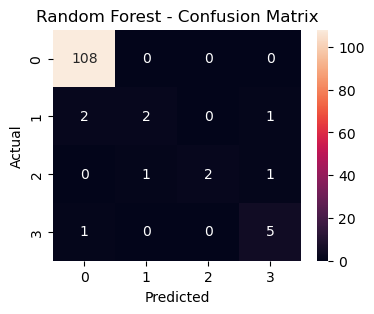

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Random Forest", acc, prec, rec, f1))

print(f"\nRandom Forest Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting Results:
Accuracy: 0.9349593495934959
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       0.50      0.40      0.44         5
           2       0.50      0.25      0.33         4
           3       0.67      0.67      0.67         6

    accuracy                           0.93       123
   macro avg       0.66      0.58      0.61       123
weighted avg       0.92      0.93      0.93       123



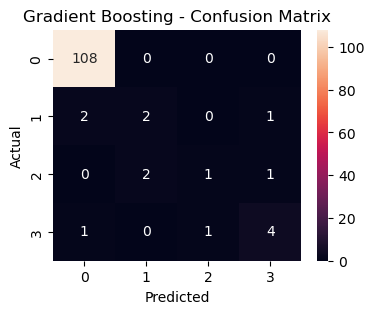

In [10]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Gradient Boosting", acc, prec, rec, f1))

print(f"\nGradient Boosting Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Create comparison DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n Model Comparison:")
print(results_df.sort_values(by='Accuracy', ascending=False))



 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.951220   0.948782  0.951220  0.945550
1    Gradient Boosting  0.934959   0.923423  0.934959  0.927448
3        Decision Tree  0.926829   0.938976  0.926829  0.931259
2  Logistic Regression  0.918699   0.905536  0.918699  0.908838


In [12]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rfc_model = GradientBoostingClassifier(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score: 0.9491857349000206


 Final Evaluation on Test Set:
Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       0.67      0.40      0.50         5
           2       0.67      0.50      0.57         4
           3       0.71      0.83      0.77         6

    accuracy                           0.95       123
   macro avg       0.76      0.68      0.71       123
weighted avg       0.95      0.95      0.95       123



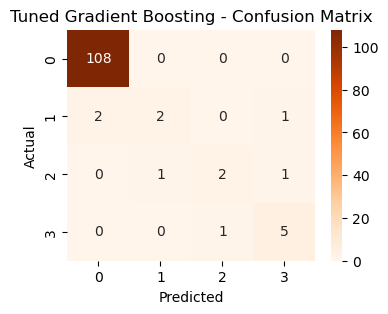

In [13]:
# Predict using best model
best_gb = grid_search.best_estimator_
y_pred_best = best_gb.predict(X_test)

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best, average='weighted')
rec = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

results.add(("Hypretuned_Gradient_Boosting", acc, prec, rec, f1))

# Evaluate
print(" Final Evaluation on Test Set:")
print("Accuracy:",acc)
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Oranges')
plt.title("Tuned Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

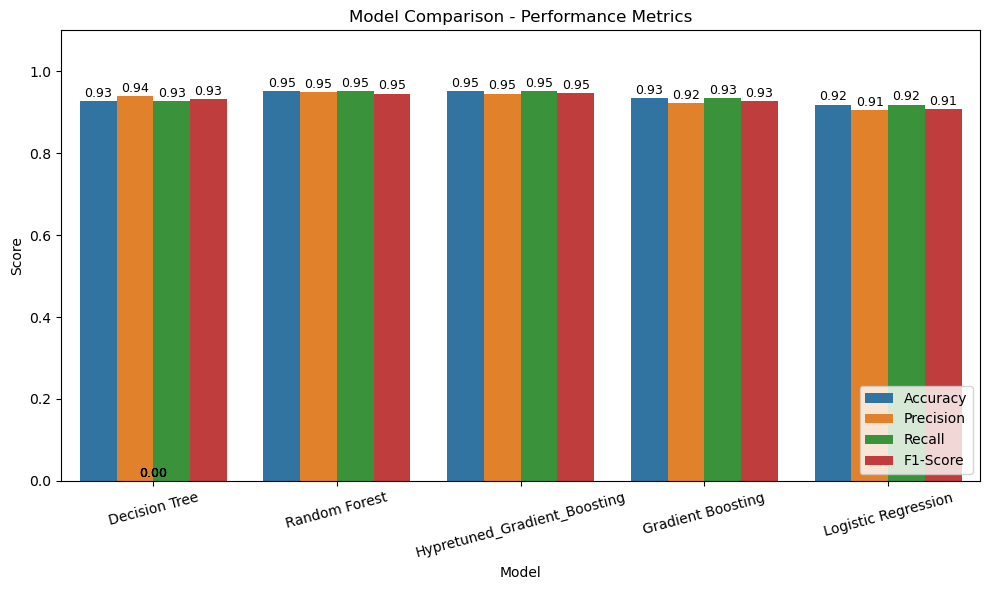

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Melt the DataFrame for plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f'{height:.2f}',
        ha="center", fontsize=9
    )

plt.title('Model Comparison - Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [15]:
import joblib
joblib.dump(best_gb, '/Users/sivakarthick/Hub/Hep/HepApp/ml_models/model_c1.pkl')
joblib.dump(scaler, '/Users/sivakarthick/Hub/Hep/HepApp/ml_models/scaler.pkl')
joblib.dump(le, '/Users/sivakarthick/Hub/Hep/HepApp/ml_models/label_encoder.pkl')
import pickle
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/model_c1.pkl', 'wb') as f:
    pickle.dump(best_gb, f)
# Save the scaler
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Save the label encoder
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [16]:
# Load the model
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/model_c1.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
# Load the scaler
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
# Load the label encoder
with open('/Users/sivakarthick/Hub/Hep/HepApp/ml_models/label_encoder.pkl', 'rb') as f:
    loaded_le = pickle.load(f)
# Feature list (in correct order)
feature_names = top_features  # Use the top features already selected

# Label mapping (update if your class names differ)
label_mapping = {
    0: 'Blood Donor',
    1: 'Hepatitis',
    2: 'Fibrosis',
    3: 'Cirrhosis'
}

# Get user inputs
user_inputs = []
for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))
    user_inputs.append(value)

# Scale the input using the existing scaler
input_array = np.array(user_inputs).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# Predict using the existing model
prediction = best_gb.predict(input_scaled)

# Decode the predicted label using the label encoder
predicted_class = label_mapping.get(prediction[0], "Unknown")
print("\nPredicted Class:", predicted_class)



Predicted Class: Fibrosis


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
